<a href="https://colab.research.google.com/github/TanuRajput110/TED-Talks-views-prediction/blob/main/TEDtalks_views_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : TED Talks Views Prediction 

#**Problem statement**

---


 ###               **TED=Technology Entertainment Design**


##TED is an unprofitable organisation that post videos online in Free. TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.It was basically started as  a conference in 1984 that designed by Richard saul wurman but due to some reasons it was unsuccesful. After 6 years in 1990 ,it back with a bang. In TED ,speaker share their views and ideas to the society in 18 minutes.

               
 ##               ***slogan of TED---    Ideas Worth Spreading.***

##What is TEDx?
###It is basically an advertisement like event which can be organised by anyone if has a free license of TED.Main aim of TED is to develop the society. The main objective of this project is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.


#***Project Work flow***

---




-Importing Libraries

-Loading the Dataset

-Preprocessing Data

-Outlier handling

-Feature Engineering

-EDA on features

-Feature selection

-Fitting the regression models and HyperParameter Tuning

-Comparison of Models

-Final selection of the model

-Conclusion







---

##**Importing Libraries**

In [1]:
#importing data wrangling libraries
import pandas as pd
import numpy as np

# importing visualization libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# importing machine learning libraries and modules
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, Lasso,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

# setting style and rcparams
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# importing library called warning to ignore warnings.
import warnings
warnings.filterwarnings('ignore')



---


##**Loading the dataset**

In [3]:
# Mount the google drive in google colab. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading dataset
df=pd.read_csv("/content/drive/MyDrive/Alma Projects/TED Talks Views Prediction-Tanu Rajput/data_ted_talks.csv")

---


## **Lets see and understand the dataset**

In [5]:
#returning top  records
df.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [6]:
# returning bottom records
df.tail(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [7]:
# shape of the dataframe
df.shape

(4005, 19)

In [8]:
# dataset information including shape, number of missing and number of unique values by defining function
def information(df):

  '''to see the data information including shape, number of missing and number of unique values'''

  print(f"Dataset Shape: {df.shape}")
  information = pd.DataFrame(df.dtypes,columns=['dtypes']).reset_index()
  information['Name'] = information['index']
  information= information[['Name','dtypes']]
  information['Null_values'] = df.isnull().sum().values    
  information['Uniques'] = df.nunique().values
  return information
result = information(df).sort_values('Null_values', ascending= False)
print(result)

Dataset Shape: (4005, 19)
              Name   dtypes  Null_values  Uniques
12        comments  float64          655      601
4      occupations   object          522     2049
5   about_speakers   object          503     2977
3     all_speakers   object            4     3306
7    recorded_date   object            1     1334
0          talk_id    int64            0     4005
17     description   object            0     4005
16             url   object            0     4005
15   related_talks   object            0     4005
14          topics   object            0     3977
13        duration    int64            0     1188
9            event   object            0      459
11  available_lang   object            0     3902
10     native_lang   object            0       12
1            title   object            0     4005
8   published_date   object            0     2962
6            views    int64            0     3996
2        speaker_1   object            0     3274
18      transcript   obj

### Observation:
1) Numerical datatypes are comments,duration,talk_id,views and rest(categorical) are object datatypes.

2) Missing values are present in few columns which needs to be treated.

### **Unique Values of all features**

In [9]:
#lets see unique values in each column
for i  in df.columns:
  print("\n")
  print(f"                        ---------------------------------------Unique Values of {i}----------------------------------------")
  print("\n")
  print(f"{df[i].unique()}")
  print("\n")



                        ---------------------------------------Unique Values of talk_id----------------------------------------


[    1    92     7 ... 62263 62784 62794]




                        ---------------------------------------Unique Values of title----------------------------------------


['Averting the climate crisis' "The best stats you've ever seen"
 'Simplicity sells' ... 'How "policing for profit" undermines your rights'
 'The electrifying speeches of Sojourner Truth'
 'The most important anus in the ocean']




                        ---------------------------------------Unique Values of speaker_1----------------------------------------


['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Dick M. Carpenter II'
 'Daina Ramey Berry' 'Cella Wright']




                        ---------------------------------------Unique Values of all_speakers----------------------------------------


["{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" ...
 "{0: 'Dick M. Carpen

### Observation:
By observing unique values it shows that there are two column with same name and details ,i.e.,speaker_1,all_speakers. So, one of the column is to be deleted.

In [10]:
# Statistical description of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [11]:
df.describe(include='O').T

,count,unique,top,freq
title,4005,4005,Averting the climate crisis,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


---

#**Preprocessing and Feature Engineering**

In [12]:
# checking duplicate values if any
df.duplicated().sum()

0

In [13]:
# Dividing  Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [14]:
#lets see numeric and categorical column
print(f"numeric column---{numeric_features.columns}")
print("\n")
print(f"feature column---{categorical_features.columns}")

numeric column---Index(['talk_id', 'views', 'comments', 'duration'], dtype='object')


feature column---Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'topics', 'related_talks', 'url', 'description',
       'transcript'],
      dtype='object')


In [15]:
#dropping "all_speaker" column
df.drop(['all_speakers'], axis = 1,inplace=True)

# **let's see the distribution of target feature before treating outliers and tranformation**

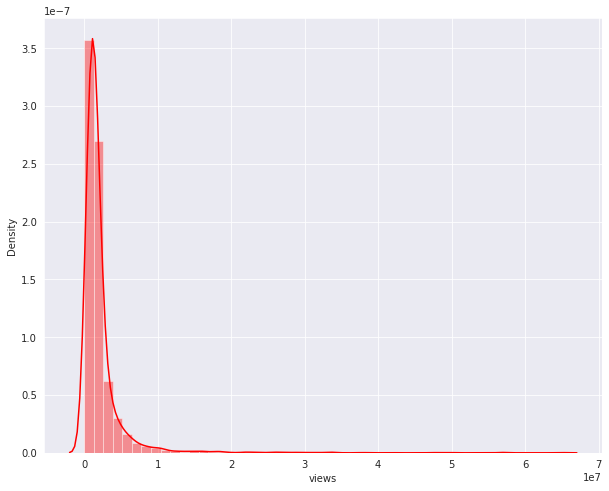

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(df.views,color='red',bins = 50)
plt.show()

## **Detecting and treating Outliers**

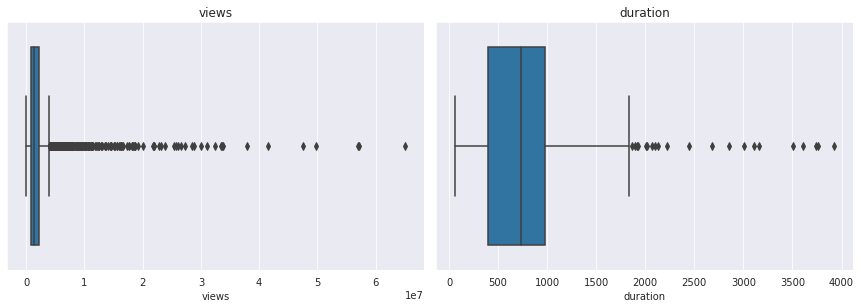

In [17]:
# checking Outliers using boxplot
columns = ['views', 'duration',]
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

we observe that Outliers are present in views,comments and duration which needs to be treated. We are replacing the outliers with the mean values.
and talk_id is id of speakers so we can't have its's data as outliers.

### **Treating Outliers**

In [18]:
# treatment outliers by mean
for i in columns:
  iqr =  df[i].quantile(0.75)-df[i].quantile(0.25)
  df[i]= df[i].mask(df[i]>(df[i].quantile(0.75)+1.5*iqr), df[i].mean())


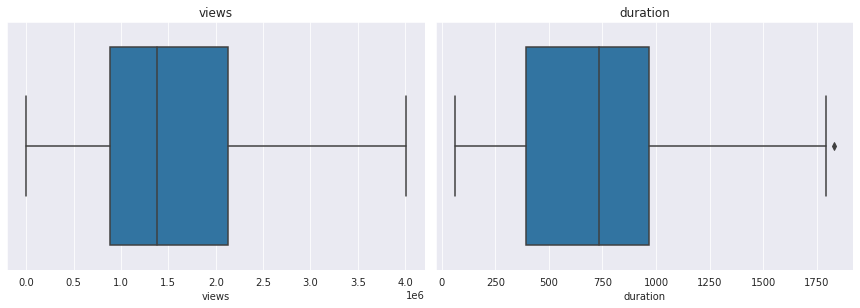

In [19]:
#let's see the numerical column again after treating outliers
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

##**Feature Engineering**

In [20]:
#let's check data type of each column
df.dtypes

talk_id             int64
title              object
speaker_1          object
occupations        object
about_speakers     object
views             float64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration          float64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

In [21]:
#change datatype of comments to int
df['comments']=df['comments'].fillna(0).astype('int64')

In [22]:
df['comments'].dtype

dtype('int64')

In [23]:
# importing Datetime
from datetime import datetime
import calendar
# Setting the Datetime formate: 
today = datetime.now()
today.strftime('%Y-%m-%d')

'2022-04-22'

In [24]:
# formatting of recorded_datetime
df['recorded_date']= pd.to_datetime(df['recorded_date'])
# formatting of publish_datetime
df['published_date']= pd.to_datetime(df['published_date'])

# periods of talks from now
last_publishing_date = df['published_date'].max()

df['time_since_published'] = last_publishing_date - pd.DatetimeIndex(df['published_date'])
df['time_since_published']

0      5056 days
1      5056 days
2      5056 days
3      5056 days
4      5056 days
          ...   
4000      3 days
4001      3 days
4002      2 days
4003      0 days
4004      0 days
Name: time_since_published, Length: 4005, dtype: timedelta64[ns]

In [25]:
# creating the list of month names and day names
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [26]:
import datetime
df['month'] = pd.DatetimeIndex(df['published_date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['year'] = pd.DatetimeIndex(df['published_date']).year
df['day'] = pd.DatetimeIndex(df['published_date']).day
df['week_day']= df['published_date'].apply(lambda x: day_order[datetime.date(x.year, x.month, x.day).weekday()])

In [27]:
#lets see daily views of Ted Talk
df['daily_views'] = df['views'] / ( df['time_since_published'].apply(lambda x : x.days) + 1 )
df['daily_views']

0          696.735614
1          424.758864
2          379.836267
3          526.808187
4          424.758864
            ...      
4000    125733.500000
4001     76796.750000
4002    154804.666667
4003     56582.000000
4004         0.000000
Name: daily_views, Length: 4005, dtype: float64

In [28]:
#all columns after feature engineering
df.columns

Index(['talk_id', 'title', 'speaker_1', 'occupations', 'about_speakers',
       'views', 'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'time_since_published', 'month',
       'year', 'day', 'week_day', 'daily_views'],
      dtype='object')

In [29]:
#view of dataset after feature engineering
df.head()

,talk_id,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,...,related_talks,url,description,transcript,time_since_published,month,year,day,week_day,daily_views
0,1,Averting the climate crisis,Al Gore,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3.523392e+06,2006-02-25,2006-06-27,TED2006,en,...,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",5056 days,Jun,2006,27,Tue,696.735614
1,92,The best stats you've ever seen,Hans Rosling,{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",2.148006e+06,2006-02-22,2006-06-27,TED2006,en,...,"{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",5056 days,Jun,2006,27,Tue,424.758864
2,7,Simplicity sells,David Pogue,{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1.920832e+06,2006-02-24,2006-06-27,TED2006,en,...,"{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",5056 days,Jun,2006,27,Tue,379.836267
3,53,Greening the ghetto,Majora Carter,{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2.664069e+06,2006-02-26,2006-06-27,TED2006,en,...,{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,5056 days,Jun,2006,27,Tue,526.808187
4,66,Do schools kill creativity?,Sir Ken Robinson,"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",2.148006e+06,2006-02-25,2006-06-27,TED2006,en,...,"{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,5056 days,Jun,2006,27,Tue,424.758864




---


##**EXPLORATORY DATA ANALYSIS**

###**Distplot for numerical features.**

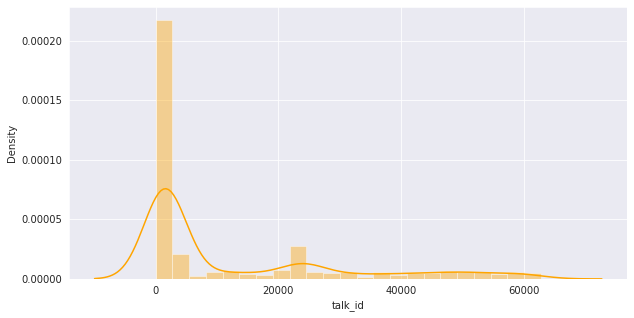

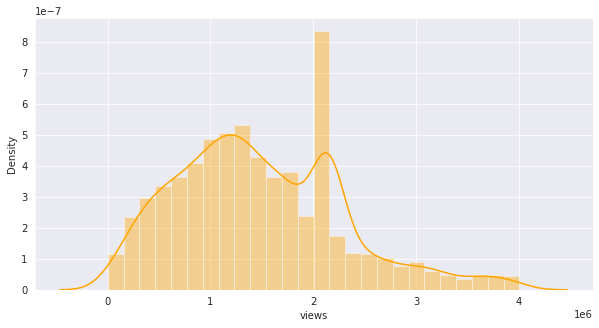

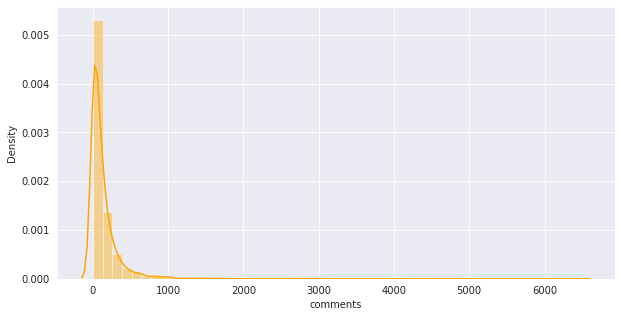

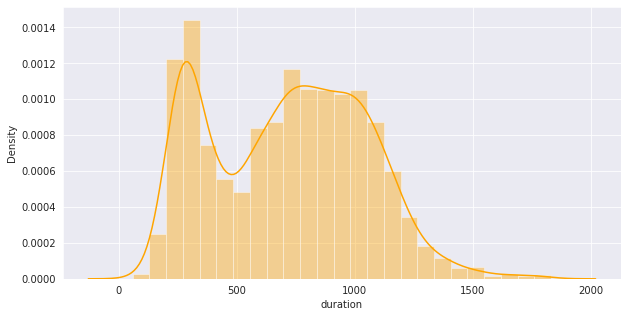

In [30]:
#distplot for all numerical features
for i in numeric_features:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i], color ='orange')

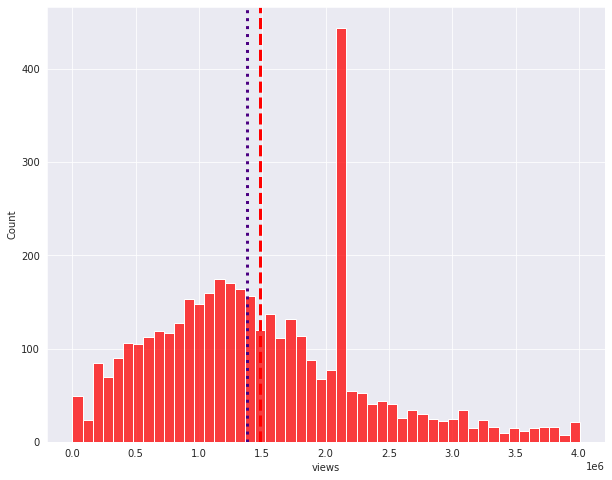

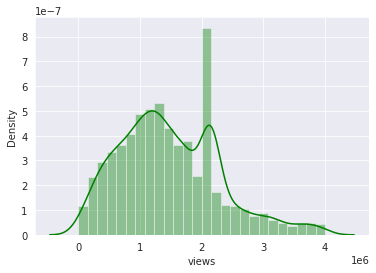

In [31]:
# Specially visualizing the distribution of the target column = views with mean and median also
plt.figure(figsize=(10,8))
sns.histplot(df['views'],bins=50, color = 'red',)
plt.axvline(df['views'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(df['views'].median(), color='indigo', linestyle='dotted', linewidth=3) 
plt.show()
sns.distplot(df['views'],color='g')
plt.show()

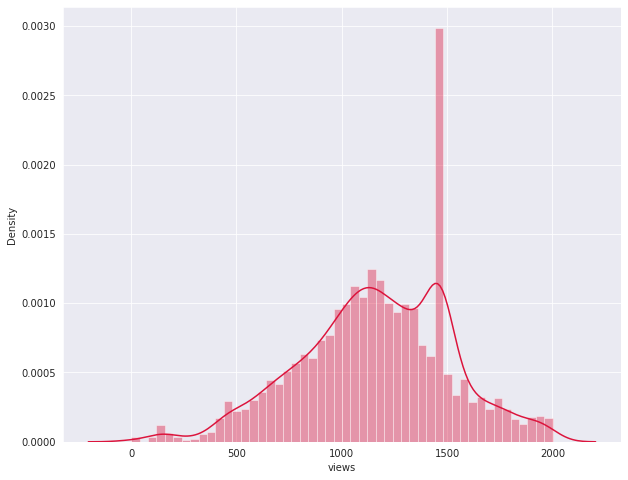

In [32]:
# lets see the distribution of the target variable after applying squareroot transformation technique.
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df.views),color='crimson',bins = 50)
plt.show()

observation:::

       Before removing the outliers ,the distribution of the target variable is rightly skewed.

       After treatingoutliers,the distribution is rightly skewed.so,we i used squareroot transformation technique to make it almost normalized.

###***Pointplot for numerical features wrt speakers***


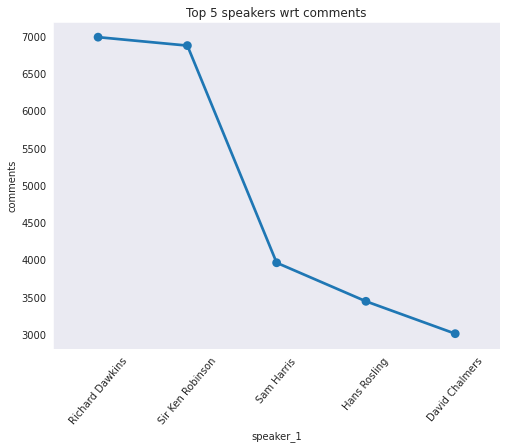

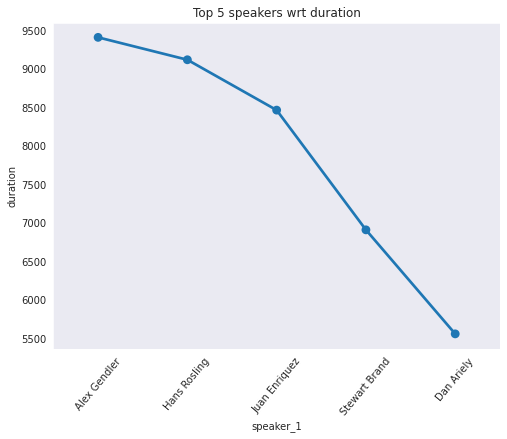

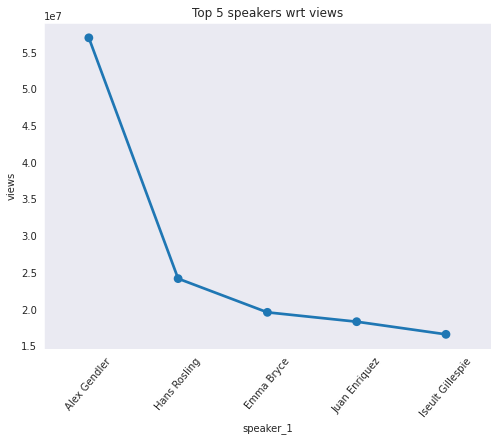

In [33]:
#top 5 speakers wrt to daily_views,comments,duration
col1=['comments','duration','views']
for i in col1:
  sp=df.groupby(['speaker_1'],as_index=False)[i].sum().sort_values(i,ascending=False)[:5]
  plt.figure(figsize=(8,6))
  ax=sns.pointplot(x='speaker_1', y=i,data=sp)
  plt.setp(ax.get_xticklabels(), rotation=50)
  plt.title(f'Top 5 speakers wrt {i}')
  ax.grid(False)



###**Speaker with more number of talk videos published.**

In [34]:
#number of talked videos count of each speaker
speaker_count = pd.DataFrame(df['speaker_1'].value_counts().reset_index().rename(columns={'index':'speaker_1','speaker_1':'video_publish_counts'}))[:10]
speaker_count

,speaker_1,video_publish_counts
0,Alex Gendler,34
1,Iseult Gillespie,19
2,Emma Bryce,12
3,Daniel Finkel,11
4,Alex Rosenthal,10
5,Hans Rosling,10
6,Juan Enriquez,9
7,Greg Gage,9
8,Chris Anderson,8
9,Dan Ariely,7


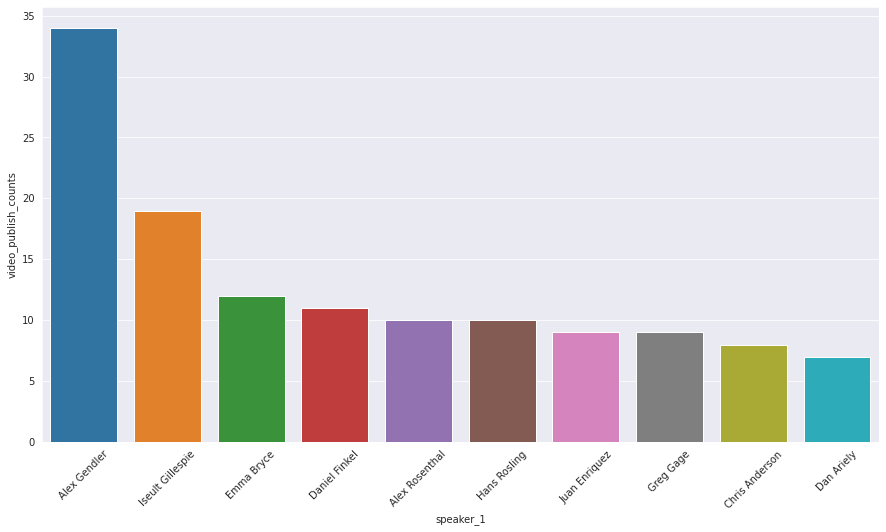

In [35]:
#count of videos published wrt to each speaker
plt.figure(figsize=(15,8))
sns.barplot(x='speaker_1',y='video_publish_counts',data=speaker_count)
plt.xticks(rotation=45)
plt.show()

Observation:

          Alex Gendlar has high ted videos

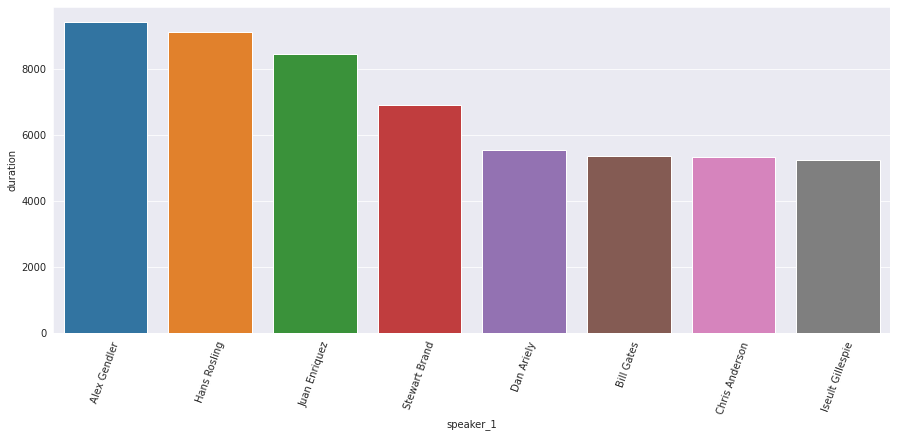

In [36]:
#duration of ted videos wrt to speakers
temp=df.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]
temp=df.groupby(['speaker_1'],as_index=False).agg({'duration':'sum','talk_id':'count'}).sort_values('duration',ascending=False).reset_index()[:8]
temp['talk_id']=temp['duration']/temp['talk_id']
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=70);

## **Speaker with  most popular video**

In [37]:
# Top 10 Speaker with  high views
speaker_popular_video=df[['speaker_1','views']].sort_values('views',ascending=False)[:10]
speaker_popular_video

,speaker_1,views
1461,Ji-Hae Park,4006448.0
1214,David R. Dow,4005543.0
2767,Steven Pinker,4004739.0
1995,Mandy Len Catron,4003824.0
607,The LXD,4000539.0
3368,Megan Campisi,4000351.0
8,Rick Warren,3998282.0
3110,Shohini Ghose,3996946.0
693,Hans Rosling,3991107.0
1915,Sophie Scott,3990365.0


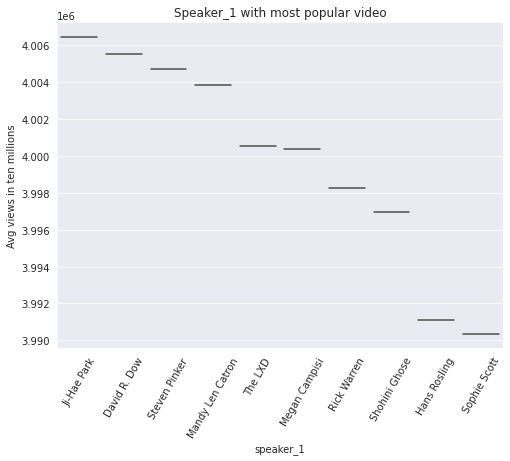

In [38]:
#visualization of video of speaker  with most views
plt.figure(figsize=(8,6))
ax=sns.violinplot(x='speaker_1',y='views',data=speaker_popular_video,color = 'r')
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Speaker_1 with most popular video')
plt.ylabel('Avg views in ten millions')
plt.show()

###**Speaker with highest average views**

In [39]:
speaker=df.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(speaker)

In [40]:
speaker_with_high_avg_views = pd.DataFrame(df['speaker_1_avg_views']).sort_values(by='speaker_1_avg_views',ascending=False).head(10)
speaker_with_high_avg_views.style.background_gradient(cmap='Greens')

,speaker_1_avg_views
4002,154804.666667
3994,85780.222222
4001,76796.750000
3995,74767.555556
3993,59449.300000
3921,57493.539683
4003,56582.000000
3991,54945.727273
3990,53717.857143
3981,52980.363636


###**Events with highest average views**

In [41]:
event=df.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
df['event_wise_avg_views']=df['event'].map(event)

In [42]:
event_with_high_avg_views = pd.DataFrame(df['event_wise_avg_views']).sort_values(by='event_wise_avg_views',ascending=False).head(10)
event_with_high_avg_views

,event_wise_avg_views
4000,98747.783730
3999,98747.783730
3995,98747.783730
3994,98747.783730
3991,54945.727273
3990,53717.857143
3982,42040.687363
3960,42040.687363
3966,42040.687363
3965,42040.687363


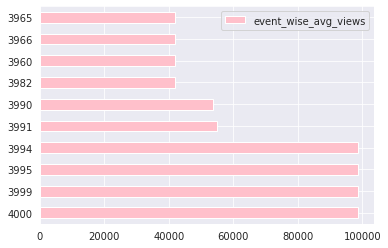

In [43]:
event_with_high_avg_views.plot.barh(color=['pink','yellow','blue','red','crimson','green','orange','deeppink','brown','black'])
plt.show()

###**Displot of available language**

In [44]:
df['number_of_lang'] = df['available_lang'].apply(lambda x: len(x))
df['number_of_lang'] 


0       270
1       303
2       165
3       219
4       387
       ... 
4000      6
4001     27
4002      6
4003      6
4004      6
Name: number_of_lang, Length: 4005, dtype: int64

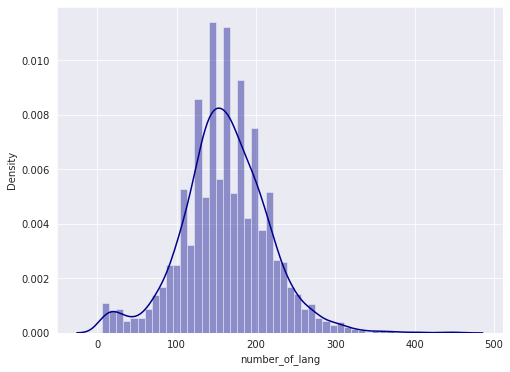

In [45]:
plt.figure(figsize=(8,6))
sns.distplot(df['number_of_lang'],bins=50,color = 'darkblue')
plt.show()

In [46]:
# creating a column named num_of_topics to see the number of topics spoke by each speaker
df['topics'] = df.apply(lambda x: eval(x['topics']), axis=1)
df['num_of_topics'] = df.apply(lambda x: len(x['topics']), axis=1)

###**Unique Topics**

In [47]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)
      
len(unique_topics)

457

In [48]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [49]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

###**Topicwise views**

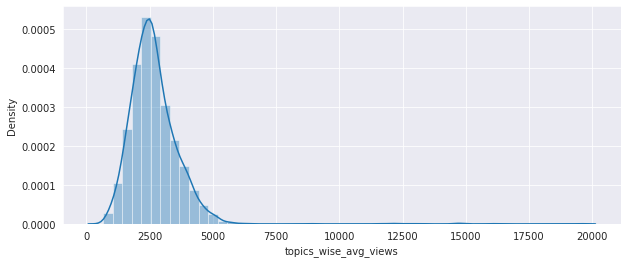

In [50]:
# visualizing the distribution of topic wise avg views
plt.figure(figsize=(10,4))
sns.distplot(df['topics_wise_avg_views'])
plt.show()



---



---


#**Correlation Matrix**

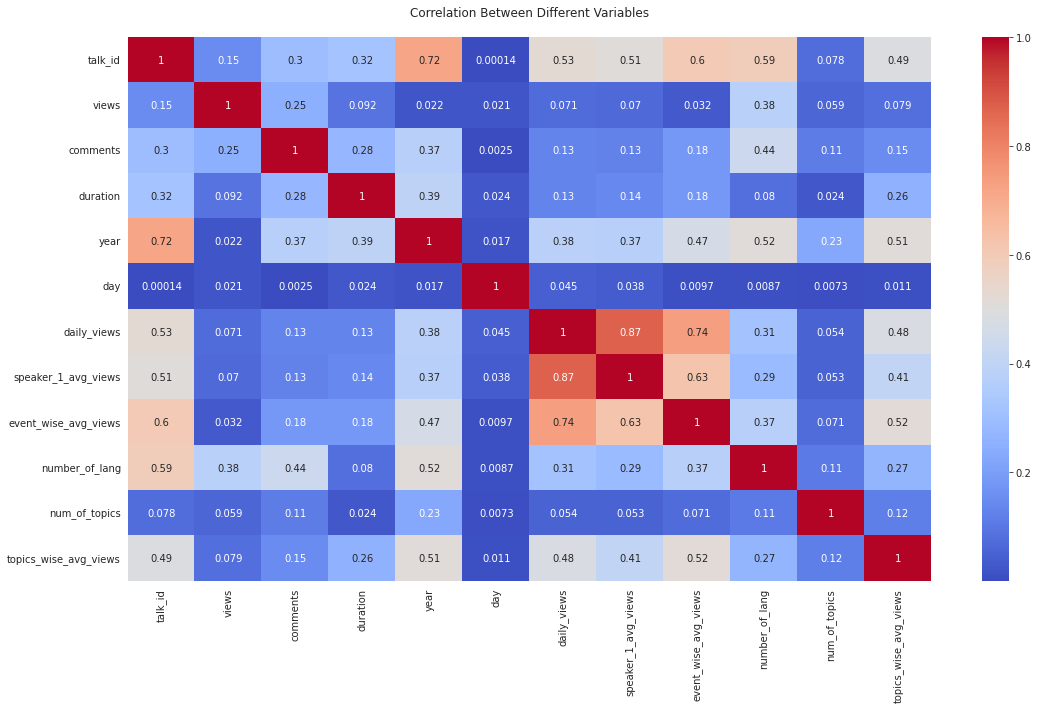

In [51]:
plt.figure(figsize=(18,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(abs(df.corr()),
            cmap='coolwarm', annot=True)     
plt.show()

###**Removing irrelevent Features**

In [52]:
unwanted_features=['talk_id', 'title', 'speaker_1', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'topics',
       'related_talks', 'url', 'description', 'transcript',
     'topics_wise_avg_views']

In [53]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'occupations', 'about_speakers',
       'views', 'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'time_since_published', 'month',
       'year', 'day', 'week_day', 'daily_views', 'speaker_1_avg_views',
       'event_wise_avg_views', 'number_of_lang', 'num_of_topics',
       'topics_wise_avg_views'],
      dtype='object')

In [54]:
#dropping unimportant columns from the datasets.
df.drop(columns=unwanted_features,inplace=True)

In [55]:
df.head()

,comments,duration,time_since_published,month,year,day,week_day,daily_views,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics
0,272,977.0,5056 days,Jun,2006,27,Tue,696.735614,699.725014,334.432782,270,9
1,628,1190.0,5056 days,Jun,2006,27,Tue,424.758864,692.580570,334.432782,303,11
2,124,1286.0,5056 days,Jun,2006,27,Tue,379.836267,398.744911,334.432782,165,9
3,219,1116.0,5056 days,Jun,2006,27,Tue,526.808187,452.806229,334.432782,219,9
4,4931,1164.0,5056 days,Jun,2006,27,Tue,424.758864,619.837418,334.432782,387,7




---



---


# **Preparing the Data For Modelling.**

we can see that we have a column named time_published having datatype timedelta..convert that into integer.

In [56]:
df['time_since_published']=df['time_since_published'].dt.days

In [57]:
df['time_since_published']

0       5056
1       5056
2       5056
3       5056
4       5056
        ... 
4000       3
4001       3
4002       2
4003       0
4004       0
Name: time_since_published, Length: 4005, dtype: int64

In [58]:
#separating the dependent and independent variables
y=(np.sqrt(df['daily_views']))
X=df.drop(columns='daily_views')

###**Encoding process**

In [59]:
#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 28)

### **train_test_split**

In [60]:
from sklearn.model_selection import train_test_split
# train_test_split the data.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3003, 28), (1002, 28), (3003,), (1002,))

In [61]:
X_train.head()

,comments,duration,time_since_published,year,day,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics,month_Apr,...,month_Nov,month_Oct,month_Sep,week_day_Fri,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
1255,69,589.0,2828,2012,2,302.650053,539.556928,189,6,0,...,0,0,0,0,0,0,0,1,0,0
678,711,1284.0,3605,2010,17,509.760122,509.760122,213,7,0,...,0,0,0,0,0,0,0,1,0,0
3737,21,1013.0,163,2019,19,14077.036585,7711.234332,72,8,0,...,1,0,0,0,0,0,0,0,1,0
1200,208,1023.0,2888,2012,3,82.417445,82.417445,117,4,0,...,0,0,0,0,0,0,1,0,0,0
2512,7,795.0,958,2017,15,1232.421272,1384.848673,105,10,0,...,0,0,1,1,0,0,0,0,0,0


In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3003, 28), (1002, 28), (3003,), (1002,))

In [63]:
X.head()

,comments,duration,time_since_published,year,day,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics,month_Apr,...,month_Nov,month_Oct,month_Sep,week_day_Fri,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
0,272,977.0,5056,2006,27,699.725014,334.432782,270,9,0,...,0,0,0,0,0,0,0,0,1,0
1,628,1190.0,5056,2006,27,692.580570,334.432782,303,11,0,...,0,0,0,0,0,0,0,0,1,0
2,124,1286.0,5056,2006,27,398.744911,334.432782,165,9,0,...,0,0,0,0,0,0,0,0,1,0
3,219,1116.0,5056,2006,27,452.806229,334.432782,219,9,0,...,0,0,0,0,0,0,0,0,1,0
4,4931,1164.0,5056,2006,27,619.837418,334.432782,387,7,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
#Taking features for using in KNNImputer
outlier_data=['duration','comments','speaker_1_avg_views','event_wise_avg_views']
from sklearn.impute import KNNImputer
# Before applying KNNImputer, we have to scale features so avoid bias.
scaler = MinMaxScaler()
#Import libraries
from sklearn.impute import KNNImputer
# define imputer
Knn= KNNImputer()
#fitting the model
Knn.fit(scaler.fit_transform(X[outlier_data]))
x_train_trf=Knn.fit_transform(X[outlier_data])
x_test_trf=Knn.transform(X[outlier_data])

In [65]:
# transform the dataset
X[outlier_data] = Knn.transform(scaler.fit_transform(X[outlier_data]))
#again applying inverse_transform on the data
X[outlier_data] = scaler.inverse_transform(X[outlier_data])

In [66]:
X.isnull().sum()

comments                0
duration                0
time_since_published    0
year                    0
day                     0
speaker_1_avg_views     0
event_wise_avg_views    0
number_of_lang          0
num_of_topics           0
month_Apr               0
month_Aug               0
month_Dec               0
month_Feb               0
month_Jan               0
month_Jul               0
month_Jun               0
month_Mar               0
month_May               0
month_Nov               0
month_Oct               0
month_Sep               0
week_day_Fri            0
week_day_Mon            0
week_day_Sat            0
week_day_Sun            0
week_day_Thu            0
week_day_Tue            0
week_day_Wed            0
dtype: int64

### Observation:
#### Comments has around 655 NaN values.we can treat it using KNN imputer

so.we remove all null values ny using KNN imputer.
now it is cleaned dataset.